<p>Note :<br>
If you have any comments/suggestions about the notebook and how to improve or optimize anything I'd be very happy to hear them!
Although I've been using Python for 8+ years I keep learning new things.<p>

<h1>Meteorite basic analysis</h1>
<p> This is just a couple of plots and basic level analysis about the dataset to see what it looks like</p>

<h2>Importing and Cleaning</h2>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np                       # linear algebra
import pandas as pd                      # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt          # plotting library
from mpl_toolkits.basemap import Basemap # library to plot maps
import seaborn as sns                    # this one is just for the fancy look

from ipywidgets import *                 # the library to include widgets

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

plt.rcParams['figure.figsize']=(10,8)

In [2]:
#Let's first clean the dataset and keep valid entries with known latitude and longitude
#data = pd.read_csv('../input/meteorite-landings.csv')
data = pd.read_csv('meteorite-landings.csv')
data = data[(data.reclat != 0.0) & (data.reclong != 0.0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39278 entries, 0 to 45715
Data columns (total 10 columns):
name           39278 non-null object
id             39278 non-null int64
nametype       39278 non-null object
recclass       39278 non-null object
mass           39147 non-null float64
fall           39278 non-null object
year           39018 non-null float64
reclat         31963 non-null float64
reclong        31963 non-null float64
GeoLocation    31963 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.3+ MB


In [3]:
# hereafter I look only at the valid entries
valids = data.groupby('nametype').get_group('Valid').copy()
#valids = data.copy()
valids.dropna(inplace=True)
valids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31685 entries, 0 to 45715
Data columns (total 10 columns):
name           31685 non-null object
id             31685 non-null int64
nametype       31685 non-null object
recclass       31685 non-null object
mass           31685 non-null float64
fall           31685 non-null object
year           31685 non-null float64
reclat         31685 non-null float64
reclong        31685 non-null float64
GeoLocation    31685 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 2.7+ MB


<h2>Geographical Study</h2>

In [ ]:
#Here comes the funny part, let's focus first on the geographical information
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.5)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6) #plotting equator tropics and polar circles

x, y = map(valids.reclong,valids.reclat)

map.scatter(x, y, marker='.',alpha=0.25,c='green',edgecolor='None')
plt.title('Map of all valids impact')

In [ ]:
#Let's create a heatmap which might be more interesting
h = plt.hist2d(valids.reclong,valids.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heat Map of all meteorites impacts')

In [ ]:
#We can easile focus on a specific area of the map, let's look at Oman :
map = Basemap(projection='cyl',llcrnrlat=10.0,urcrnrlat=30.0,llcrnrlon=40.0,urcrnrlon=70.0,resolution='i')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawcountries()

h = plt.hist2d(valids.reclong,valids.reclat,bins=(np.arange(40,71,1.0),np.arange(10,31,1)))
X,Y = np.meshgrid(h[1][:-1]+0.5,h[2][:-1]+0.5)
data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 101, 101, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.scatter(valids.reclong,valids.reclat,marker='.',alpha=0.5,edgecolor='None',color='m')

<p>I don't think meteorite choose in which country they land. There's very very likely a bias linked to geopolitics and population density </p>
<p>I recommend the reader to download the notebook and look at different regions of the map, it is pretty easy to do using Basemap, simply change : <br><i>llcrnrlat=lower_left_corner_latitude <br >urcrnrlat=upper_right_corner_latitude <br> llcrnrlon= lower_left_corner_longitude <br> urcrnrlon=upper_right_corner_longitude</i></p>

In [4]:
# What about the difference between ones seen falling and ones found
v_fell = valids.groupby('fall').get_group('Fell')
v_found = valids.groupby('fall').get_group('Found')

In [ ]:
plt.subplot(211)
h = plt.hist2d(v_fell.reclong,v_fell.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heat Map of meteorites seen falling')

plt.subplot(212)
h = plt.hist2d(v_found.reclong,v_found.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heat Map of meteorites founds')

<h3>Comment</h3>
<p>Meteorites seen falling seems to correlate with densely populated area (make sense) while meteorites are found in more desertic areas.
There is probably a deviation to this "first order" correlation due to the following factors :
 <ul>
<li>Light Polution : observation is obviously more difficult in inner cities or near sources of bright light
<li>Land cover type : It is probably easier to find a meteorite in the desert than in the middle of the rainforest. Add to this the local geological activity that can "destroy" fallen meteorites (though this effect is likely very localized).
</ul>
</p>

<p>This would need to be quantified!!! Will try to include this later...</p>

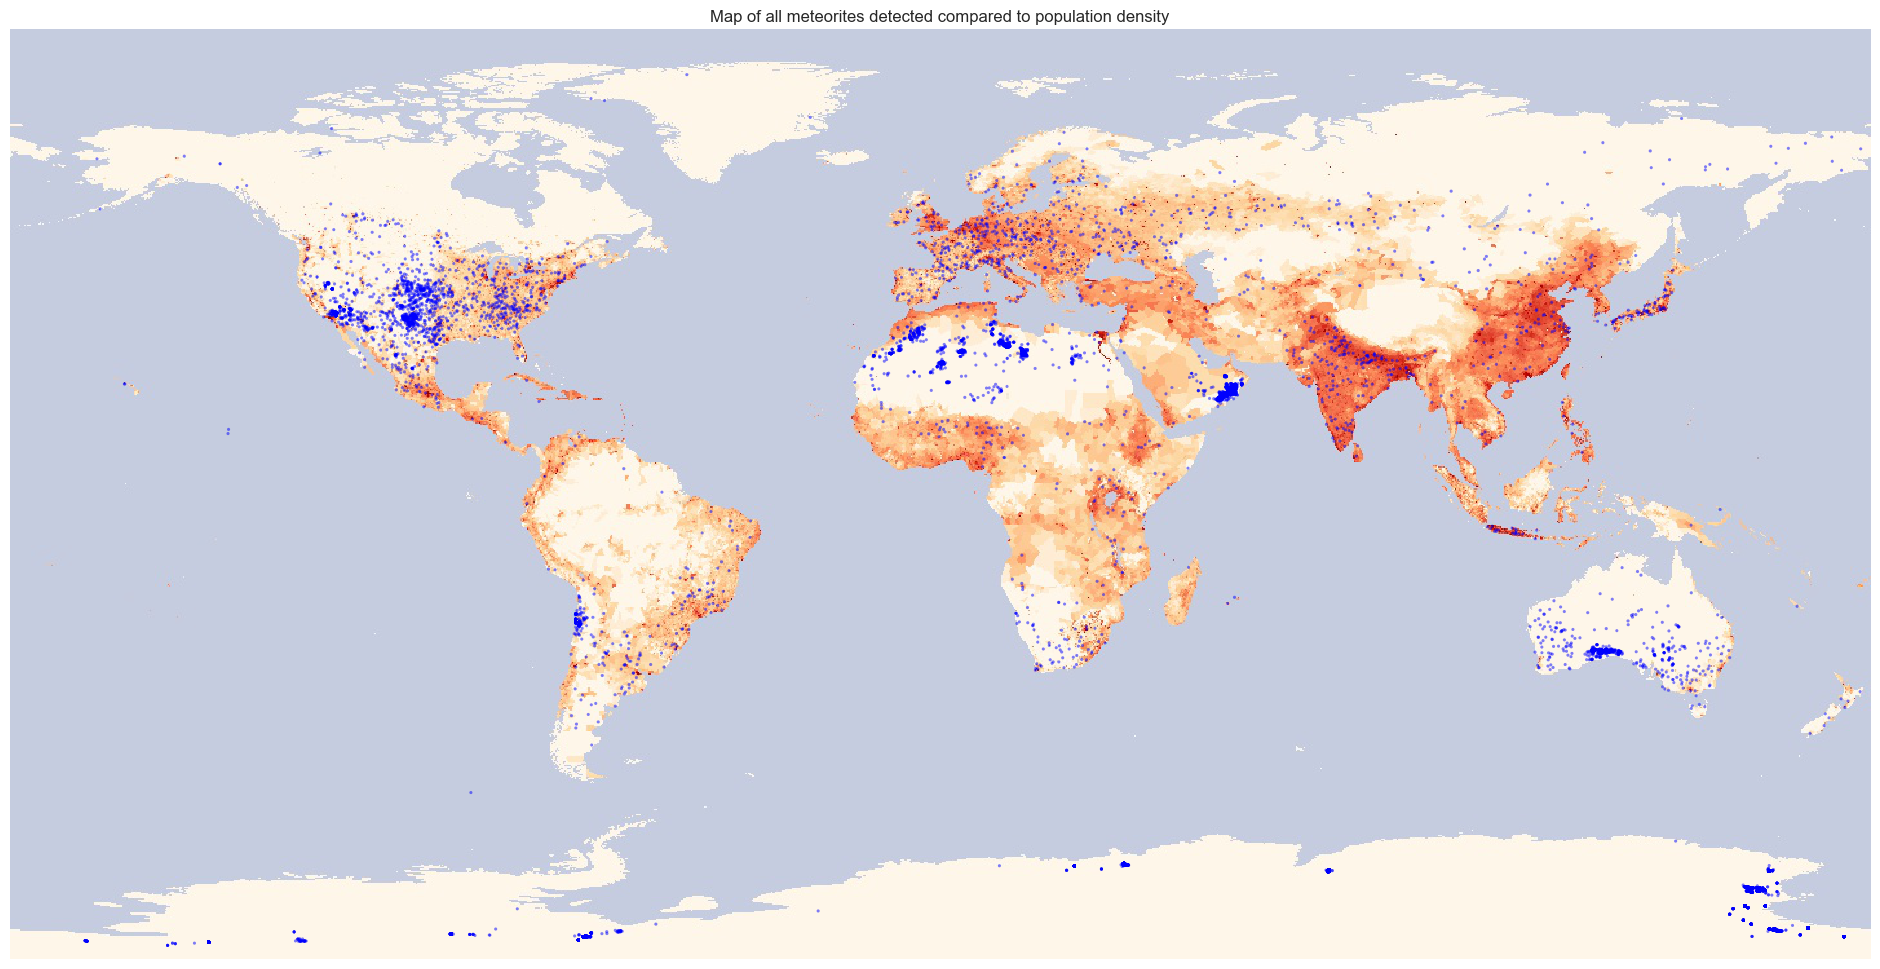

In [5]:
plt.figure(figsize=(25,12))

map = Basemap(projection='cyl',resolution='i')
map.warpimage(image='http://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=875430&cs=rgb&format=JPEG&width=1440&height=720')
map.scatter(valids.reclong,valids.reclat,marker='.',alpha=0.5,edgecolor='None',color='b')

plt.title('Map of all meteorites detected compared to population density')
#plt.savefig('all_density_pop.jpg')

In [ ]:
plt.figure(figsize=(25,12))

map = Basemap(projection='cyl',resolution='i')
#map.warpimage('resized.png')
map.warpimage(image='http://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=875430&cs=rgb&format=JPEG&width=1440&height=720')
#map.drawcoastlines(linewidth=0.2)
map.scatter(v_found.reclong,v_found.reclat,marker='.',alpha=0.5,edgecolor='None',color='m')

plt.title('Map of meteorites found compared to population density')
plt.savefig('found_density_pop.jpg')

In [ ]:
plt.figure(figsize=(25,12))

map = Basemap(projection='cyl',resolution='i')
map.warpimage(image='http://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=875430&cs=rgb&format=JPEG&width=1440&height=720')
#map.drawcoastlines(linewidth=0.2)
map.scatter(v_fell.reclong,v_fell.reclat,marker='.',alpha=0.5,edgecolor='None',color='k')

plt.title('Map of meteorites seen falling compared to population density')
plt.savefig('fell_density_pop.jpg')

In [ ]:
#Another view of the previous statement
map = Basemap(projection='cyl',llcrnrlat=10,llcrnrlon=-20,urcrnrlat=50,urcrnrlon=40,resolution='c')
map.etopo()
#map.drawmapboundary(fill_color='w')
#map.drawcoastlines(linewidth=0.6)
map.drawcountries()

map.scatter(v_fell.reclong,v_fell.reclat,edgecolor='none',color='k',alpha=0.6)
map.scatter(v_found.reclong,v_found.reclat,edgecolor='none',color='m',alpha=0.6)

plt.title('Comparison between meteorites found (magenta) and meteorites seen fallin (black)')

In [ ]:
# NOTE : This cell does not work properly here cf because of some external configuration
# You can download the notebook and if you have ipywidgets installed it should run smoothly

# Now an interactive figure showing the two types of meteorites ("seen falling" and "found")
# as a function of the year
def fscat(x):
    plt.figure(figsize=(10,8))
    map = Basemap(projection='cyl',resolution='c')
    map.drawmapboundary(fill_color='w')
    map.drawcoastlines(linewidth=0.5)
    map.scatter(v_fell.reclong[v_fell.year==x],v_fell.reclat[v_fell.year==x],
                color='blue',alpha=0.7)
    map.scatter(v_found.reclong[v_found.year==x],v_found.reclat[v_found.year==x],
                color='green',alpha=0.7)
    return 

wid = IntSlider(min=1900,max=2013,step=1,description='Year',layout=Layout(width='75%'))
_ = interact(fscat,x=wid)

<h2>Historical Analysis</h2>

In [ ]:
plt.subplot(211)
valids.year.hist(bins=np.arange(1900,2014,1),figsize=(8,7))
plt.title('Discoveries per year 1900-2013')
plt.xlim(1900,2014)

plt.subplot(212)
valids.year.hist(bins=np.arange(1900,2023,10),figsize=(8,7))
plt.title('Discovery per decade 1900-2013')
plt.xlim(1900,2014)

In [ ]:
plt.subplot(211)
valids[valids.fall=='Fell'].year.hist(bins=np.arange(1900,2014,1),figsize=(8,7))
plt.title('Discoveries per year 1900-2013')
plt.xlim(1900,2014)

plt.subplot(212)
valids[valids.fall=='Fell'].year.hist(bins=np.arange(1900,2023,10),figsize=(8,7))
plt.title('Discovery per decade 1900-2013')
plt.xlim(1900,2014)